## Рассуждения

Одно из данных нам условий на периодичность. Давайте подберём такую высоту орбиты, чтобы 1 спутник приходил в ту же точку через какое-то количество оборотов.
И давайте максимизируем число этих оборотов. Зачем? Чтобы по возвращению спутника в стартовую точку, он замёл как можно больший путь.
Ведь чем больше он заметёт, тем точнее будет сетка. А так как мы минимизируем число спутников, то мы как раз этого и хотим.

Подбором рассчитаем нужные нам высоты. Давайте сделаем ограничение на минимальное число оборотов в 60, потому что мы так захотели.

In [41]:
from math import pi, sqrt

R = 6_371_302
MU = 398600.4415 * 10 ** 9
OMEGA_E = 7.29211 * 10 ** -5
T_E = 2 * pi / OMEGA_E

In [52]:
T_MAX = 100 * 3600

H_MIN = 400_000
H_MAX = 600_000
dH = 0.1


def print_periodic_h(resolution_max, k_min):
    h = H_MIN

    while h <= H_MAX:
        a = R + h
        T = 2 * pi * sqrt(a ** 3 / MU)
        delta_lambda = 360 * T / T_E

        k_max = int(T_MAX / T)
        for k in range(1, k_max + 1):
            phase = k * delta_lambda % 360
            delta = min(abs(phase), abs(360 - phase))

            resolution = delta / 360 * 2 * pi * R

            if resolution < resolution_max and k >= k_min:
                print(f'h = {h:.1f}; t = {k}; resolution = {resolution:.2f}')

        h += dH


print_periodic_h(100, 60)

h = 411187.7; t = 62; resolution = 97.30
h = 411187.8; t = 62; resolution = 93.76
h = 411187.9; t = 62; resolution = 90.22
h = 411188.0; t = 62; resolution = 86.68
h = 411188.1; t = 62; resolution = 83.13
h = 411188.2; t = 62; resolution = 79.59
h = 411188.3; t = 62; resolution = 76.05
h = 411188.4; t = 62; resolution = 72.51
h = 411188.5; t = 62; resolution = 68.97
h = 411188.6; t = 62; resolution = 65.43
h = 411188.7; t = 62; resolution = 61.89
h = 411188.8; t = 62; resolution = 58.34
h = 411188.9; t = 62; resolution = 54.80
h = 411189.0; t = 62; resolution = 51.26
h = 411189.1; t = 62; resolution = 47.72
h = 411189.2; t = 62; resolution = 44.18
h = 411189.3; t = 62; resolution = 40.64
h = 411189.4; t = 62; resolution = 37.10
h = 411189.5; t = 62; resolution = 33.56
h = 411189.6; t = 62; resolution = 30.01
h = 411189.7; t = 62; resolution = 26.47
h = 411189.8; t = 62; resolution = 22.93
h = 411189.9; t = 62; resolution = 19.39
h = 411190.0; t = 62; resolution = 15.85
h = 411190.1; t 

Возьмем высоту в $h=485115$ м. Для этой высоты периодичная орбита имеет максимальное число оборотов: 61. Мы отбросили $h=411190.4$ м с периодом в 62 оборота,
потому что на самом деле там период в 31 оборот. Период для нашей выбранной высоты будет $T \approx 2\pi\sqrt{a^3/\mu} \approx 92.6$ мин.
А смещение по экватору $\Delta\lambda_{\rm rotation} = 360^\circ\frac{T}{T_{\rm E}} \approx 23.61^\circ$.
И через 61 оборот спутник будет над точкой старта с разницей меньше метра. И это умещается в ограничение на периодичность в 100 часов.

А что по разрешению на экваторе? Раз спутник возвращается в ту же точку, то пересечения с экватором будет происходить через равные промежутки (без доказательства).
Так как восходящий и нисходящий трек считаются разными, то число пересечений будет $2 \cdot 61 = 122$ и разрешение составит $\approx 328.13$ км.
А это очень близко к поставленной планке в 200 км! Что-то нам подсказывает, что двух спутников будет достаточно для этой цели.

In [66]:
H = 485115
ROTATIONS = 61

A = R + H
T = 2 * pi * sqrt(A ** 3 / MU)
T_TOTAL = T * ROTATIONS


def print_params():
    print(f'T = {T / 60:.1f} мин')

    delta_lambda = 360 * T / T_E
    print(f'delta_lambda = {delta_lambda:.2f}')

    phase = ROTATIONS * delta_lambda % 360
    phase_delta = min(phase, abs(360 - phase))
    error = phase_delta / 360 * 2 * pi * R
    print(f'error = {error:.2f} м')

    print(f'total_time = {T_TOTAL / 3600:.2f} ч')

    resolution = 360 / (ROTATIONS * 2)
    resolution = resolution / 360 * 2 * pi * R
    print(f'resolution = {resolution / 1000:.2f} км')


print_params()

T = 94.2 мин
delta_lambda = 23.61
error = 0.67 м
total_time = 95.74 ч
resolution = 328.13 км


Рассмотрим два спутника. Что мы хотим потребовать от второго спутника? Мы хотим, чтобы он пересекал экватор между точками пересечения первого спутника.
Расстояние между двумя точками пересечения первого спутника, которые идут в порядке увеличения долготы, составляет
$\Delta\lambda = 360^\circ / (2 \cdot {\rm ROTATIONS}) \approx 2.95^\circ$.

Самый простой способ вывести второй спутник тогда, будет таким, что долгота его восходящего узла будет отличаться от долготы восходящего узла первого спутника
на $\Delta\lambda / 2 \approx 1.48^\circ$ (при условии, что спутники стартуют на экваторе, например). Если же мы хотим, чтобы орбиты двух спутников
лежали в одной плоскости, то разница между их истинными аномалиями должна быть 180 градусов.

Итого расстояние между ближайшими пересечениями экватора этой группы спутников будет $\Delta p = \Delta\lambda / 2 / 360 * 2\pi R \approx 164$ км. Что удовлетворяет условию задачи.

In [130]:
def print_deltas():
    delta_lambda = 360 / 2 / ROTATIONS

    print(f'delta_lamda = {delta_lambda:.2f}')
    print(f'delta_lamda / 2 = {delta_lambda / 2:.2f}')
    print(f'delta_p = {delta_lambda / 2 / 360 * 2 * pi * R / 1000:.2f} км')


print_deltas()

delta_lamda = 2.95
delta_lamda / 2 = 1.48
delta_p = 164.07 км


## Рисуем граундтреки

В предыдущем пункте мы обсудили как можно задавать значения второго спутника. Вне зависимости от этого его полная траектория будет одинаковой.
Конкретно тут рассмотрим движение в одной плоскости с разностью истинных аномалий в 180 градусов.

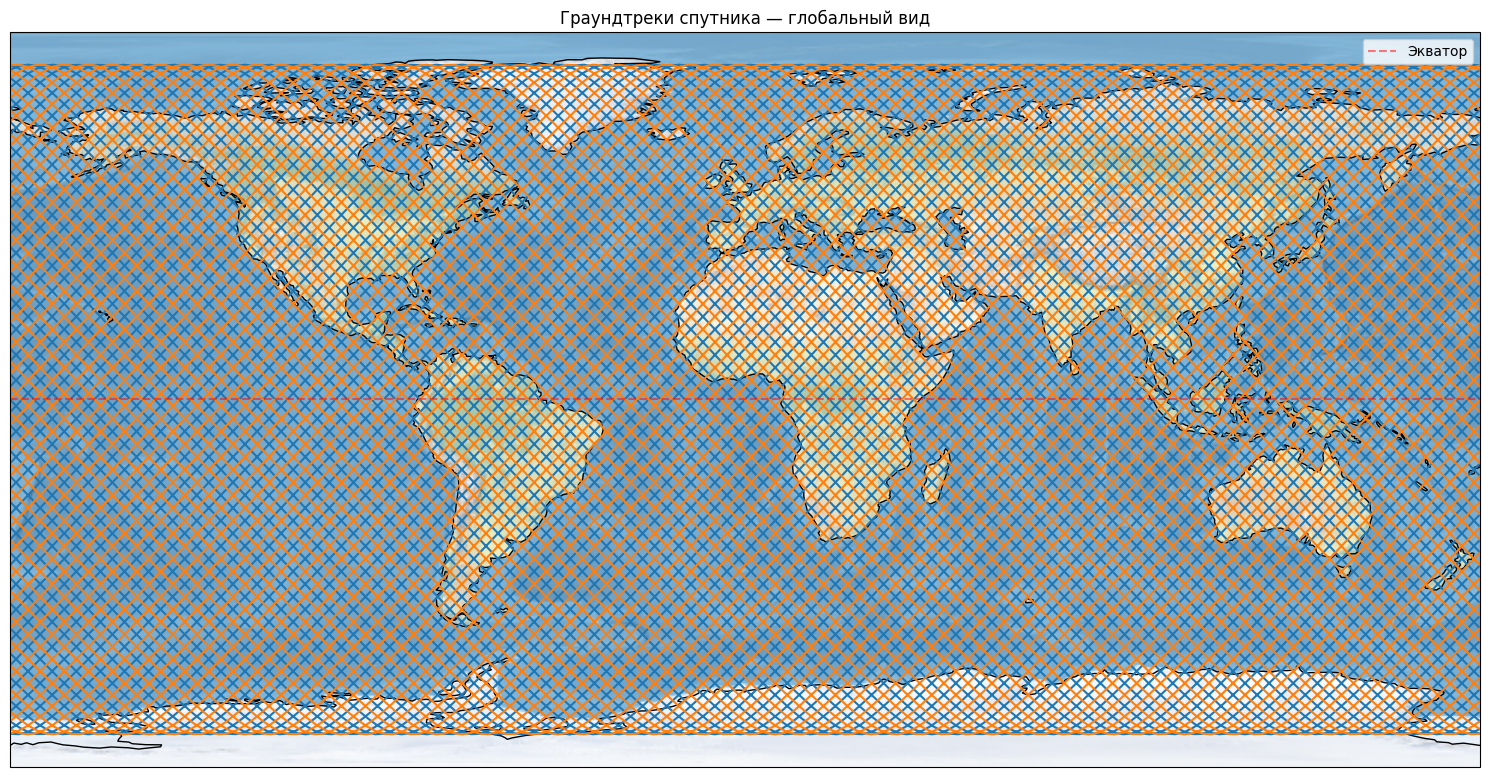

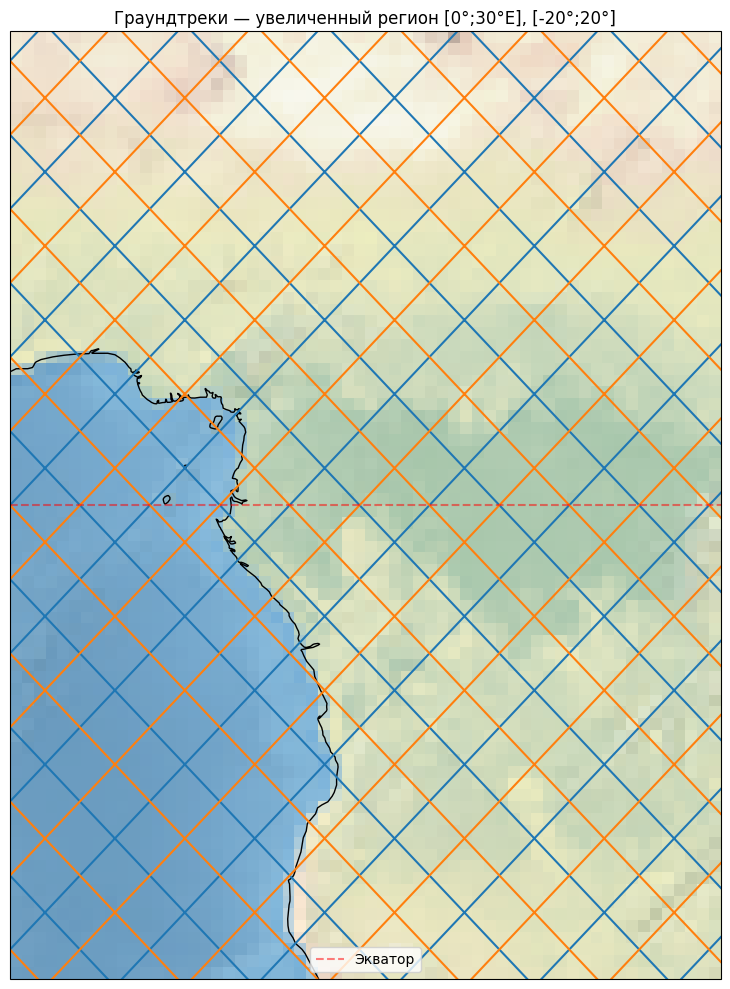

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from math import pi

i = np.deg2rad(98)  # inclination

time_points = 10_000
t = np.linspace(0, T_TOTAL, time_points)

# Поскольку орбита принимается круговой, истинная аномалия:
theta1 = t * sqrt(MU / A ** 3)
theta2 = theta1 + pi

# Геодезические широта и долгота трека
# Учёт вращения Земли: долгота = (угол орбиты − вращение Земли) с обёрткой в [−π, π]
lat1 = np.arcsin(np.sin(i) * np.sin(theta1))
lon1 = (theta1 - OMEGA_E * t + pi) % (2 * pi) - pi
lat2 = np.arcsin(np.sin(i) * np.sin(theta2))
lon2 = (theta1 - OMEGA_E * t + pi) % (2 * pi) - pi

lat_deg1 = np.rad2deg(lat1)
lon_deg1 = np.rad2deg(lon1)
lat_deg2 = np.rad2deg(lat2)
lon_deg2 = np.rad2deg(lon2)

# ========= ПЛОТ 1: ВСЯ ЗЕМЛЯ ============
plt.figure(figsize=(15, 10))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.coastlines()
ax1.plot(lon_deg1, lat_deg1, transform=ccrs.Geodetic())
ax1.plot(lon_deg2, lat_deg2, transform=ccrs.Geodetic())
ax1.plot(np.linspace(-180, 180, 1000), np.zeros(1000), 'r--', alpha=0.5, transform=ccrs.Geodetic(), label='Экватор')
ax1.legend()
plt.title('Граундтреки спутника — глобальный вид')

plt.tight_layout()
plt.savefig('earth_global.png', dpi=150)

# ========= ПЛОТ 2: УВЕЛИЧЕННЫЙ РЕГИОН ============
plt.figure(figsize=(15, 10))
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.set_extent([0, 30, -20, 20], crs=ccrs.PlateCarree())
ax2.stock_img()
ax2.coastlines()
ax2.plot(lon_deg1, lat_deg1, transform=ccrs.Geodetic())
ax2.plot(lon_deg2, lat_deg2, transform=ccrs.Geodetic())
ax2.plot(np.linspace(0, 30, 500), np.zeros(500), 'r--', alpha=0.5, transform=ccrs.Geodetic(), label='Экватор')
ax2.legend()
plt.title('Граундтреки — увеличенный регион [0°;30°E], [-20°;20°]')

plt.tight_layout()
plt.savefig('earth_zoomed.png', dpi=150)